<a href="https://colab.research.google.com/github/LuisEduardoRB/EDP-II/blob/main/Grafo%20de%20un%20domingo%20productivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ruta crítica: X → A → B → C → D → E → F → G → H
Duración total (horas): 12.5


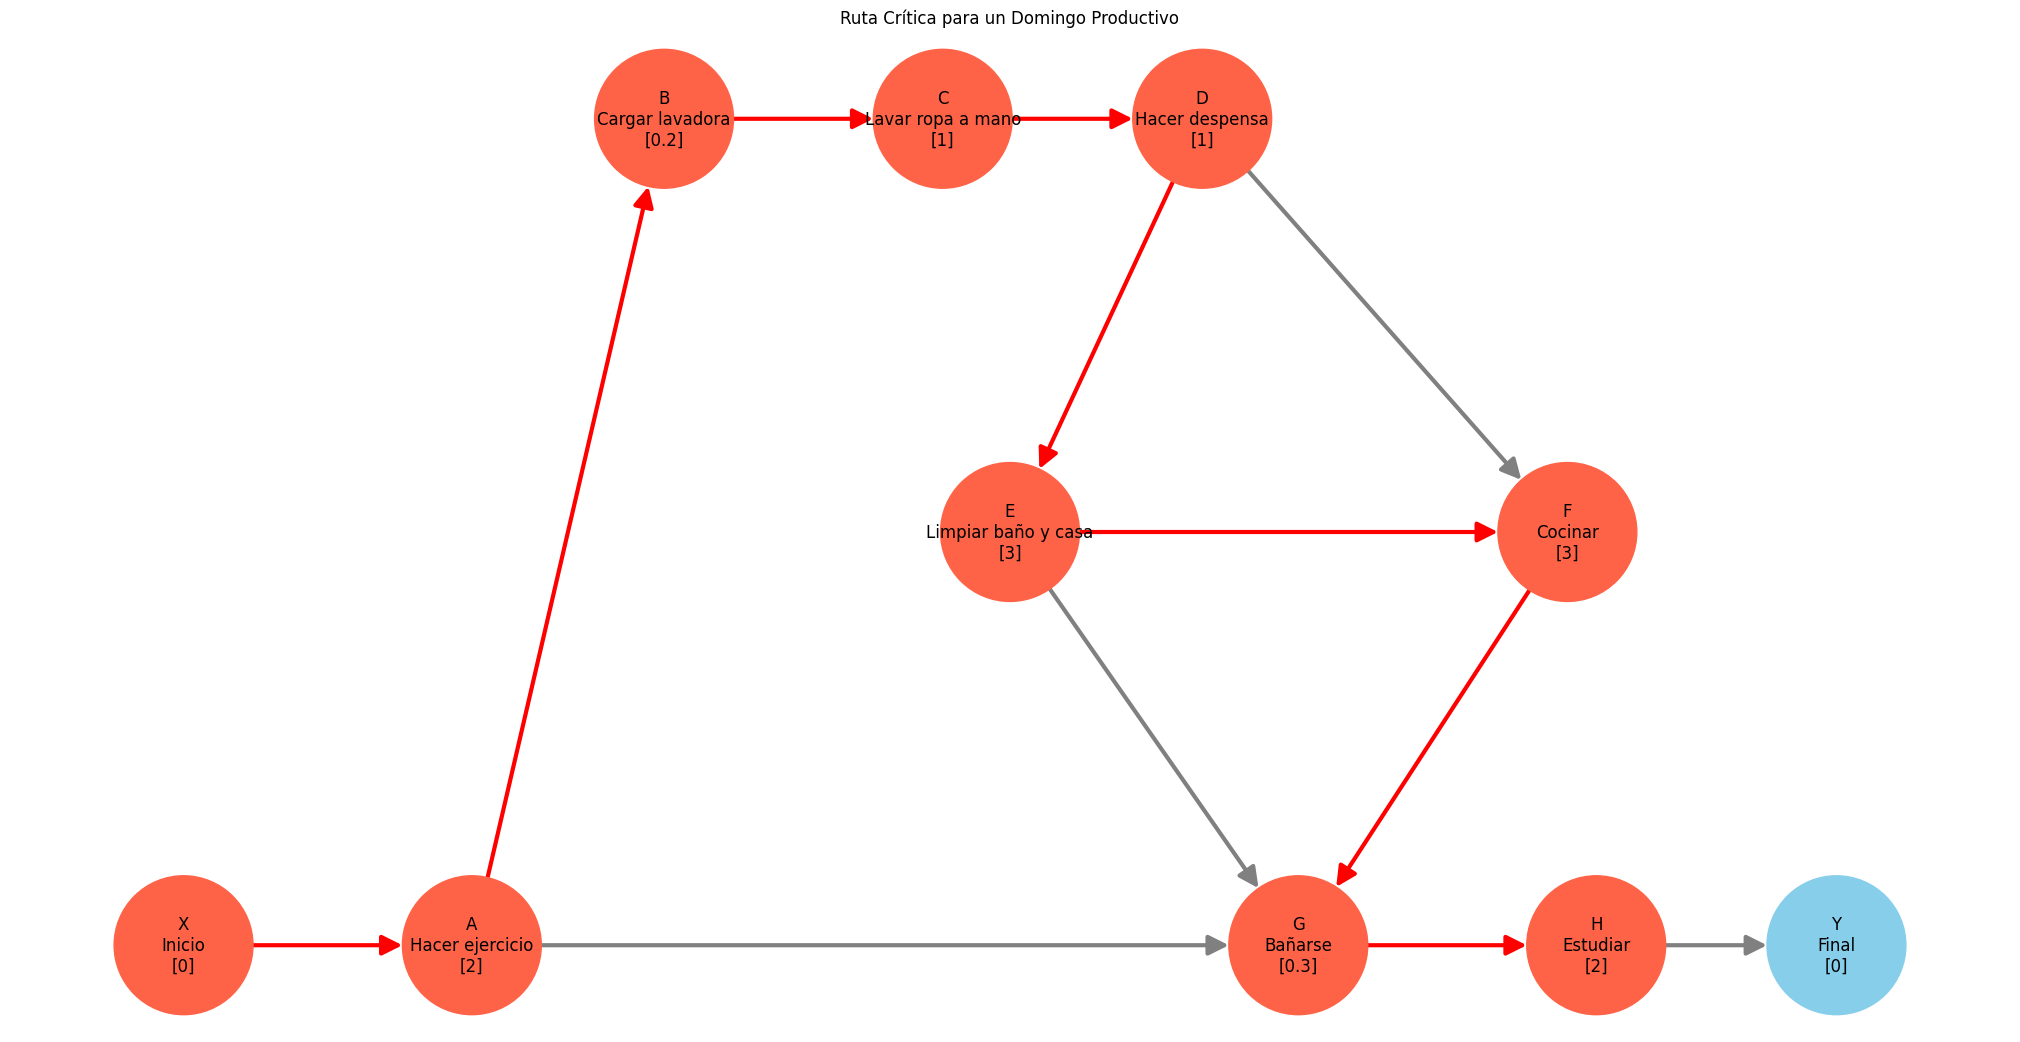

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
# Creamos los datos del grafo con su respectivo valor
# en horas y sus predecesores.EL formaro que sigue es el siguiente:
# (nodo, tarea, duracion, [predecesores])
datos = [
    ("X", "Inicio",0,[]),
    ("A", "Hacer ejercicio", 2, ["X"]),
    ("B", "Cargar lavadora", 0.2, ["A"]),
    ("C", "Lavar ropa a mano", 1, ["B"]),
    ("D", "Hacer despensa", 1, ["C"]),
    ("E", "Limpiar baño y casa", 3, ["D"]),
    ("F", "Cocinar", 3, ["D","E"]),
    ("G", "Bañarse", 0.3, ["F", "E","A"]),
    ("H", "Estudiar", 2, ["G"]),
    ("Y", "Final",0,["H"])
]
# Definimos las posiciones de los nodos para una mejor visualización
pos = {
    "X": (-1, 0.0),
    "A": (2.0, 0.0),
    "B": (4.0, 1.6),
    "C": (6.9, 1.6),
    "D": (9.6, 1.6),
    "E": (7.6, 0.8),
    "F": (13.4, 0.8),
    "G": (10.6, 0),
    "H": (13.7, 0.0),
    "Y": (16.2, 0.0),
}
# Creamos el grafo dirigido
G=nx.DiGraph()

# agregamos los nodos con sus características
for nodo, tarea, dur, preds in datos:
    G.add_node(nodo, tarea=tarea, dur=dur)

# agregamos los arcos con sus nodos dependientes
for nodo, tarea, dur, preds in datos:
    for p in preds:
        G.add_edge(p, nodo)

# Asignamos pesos a los arcos = duración del nodo destino
for u, v in G.edges():
    G[u][v]["peso"] = G.nodes[v]["dur"]

# Calculamos la ruta crítica y la duración total y lo impirmimos
ruta_critica = nx.dag_longest_path(G, weight="peso")
duracion_total = nx.dag_longest_path_length(G, weight="peso")

print("Ruta crítica:", " → ".join(ruta_critica))
print("Duración total (horas):", duracion_total)

# Damos el tamaño en el que se visualizará el grafo
plt.figure(figsize=(20, 10))
# La función que creamos acontinuación, permite
# dibujar el grafo con las etiquetas personalizadas. Sin esto,
# solo se mostrarían los nombres de los nodos.
labels = {n: f"{n}\n{G.nodes[n]['tarea']}\n[{G.nodes[n]['dur']}]" for n in G.nodes}


# Finalmente, dibujamos el grafo con las etiquetas personalizadas
# y con las posiciones que definimos al inicio.
# Además, destacamos la ruta crítica en rojo y los nodos en color tomate.
crit_edges = set(zip(ruta_critica, ruta_critica[1:]))
edge_colors = ["red" if (u, v) in crit_edges else "gray" for u, v in G.edges()]
node_colors = ["tomato" if n in ruta_critica else "skyblue" for n in G.nodes()]
nx.draw(G, pos,
        with_labels=True,
        labels=labels,
        node_size=10000, node_color=node_colors,
        font_size=12, arrowsize=30, edge_color=edge_colors, width=3)
plt.title("Ruta Crítica para un Domingo Productivo")
plt.show()